In [88]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data = pd.read_excel(open('Heritage_Funding.xlsx', 'rb'),
                     sheet_name='Data') 
data = data[['donor_name', 'contribution', 'year']].copy()

In [117]:
data.describe()

,contribution,year
count,1.451000e+03,1451.000000
mean,1.359195e+05,2006.702274
std,4.468664e+05,6.664025
min,0.000000e+00,1985.000000
25%,5.000000e+03,2003.000000
50%,2.500000e+04,2008.000000
75%,1.000000e+05,2012.000000
max,9.049250e+06,2017.000000


In [118]:
total = data.groupby(['year']).sum()
total = dict(zip(total.index, total['contribution']))

In [119]:
data['percentage'] = data[['year','contribution']].apply(lambda x: x[1]/total[x[0]], axis=1)

In [157]:
data = data[(data["percentage"]>0.10) & (data['year']>=2000) ]
donors = list(set(data['donor_name']))
len(donors)

12

In [158]:
s_data = pd.DataFrame({'year':range(2000, 2018)})

for donor in donors:
    cut = data[data['donor_name']==donor]
    contbt = [list(cut[cut['year']==yr]['percentage']) for yr in range(2000, 2018)]
    s_data[donor] = [sum(i) if len(i) > 0 else 0 for i in contbt]

In [160]:
s_data = s_data.set_index('year')

In [159]:
s_data

,year,Schwab Charitable Fund,Charles G. Koch Charitable Foundation,DeVos Urban Leadership Initiative,Herrick Foundation,John M. Olin Foundation,Howard Charitable Foundation,Lillian S. Wells Foundation,Diana Davis Spencer Foundation,Sarah Scaife Foundation,National Christian Charitable Foundation,The Samuel Roberts Noble Foundation,Allegheny Foundation
0,2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.308683,0.000000,0.148168,0.000000
1,2001,0.000000,0.000000,0.000000,0.000000,0.131687,0.000000,0.000000,0.000000,0.243621,0.000000,0.000000,0.000000
2,2002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288016,0.000000,0.000000,0.000000
3,2003,0.000000,0.000000,0.000000,0.105446,0.000000,0.000000,0.000000,0.000000,0.168713,0.000000,0.000000,0.000000
4,2004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140510,0.000000,0.124898,0.000000,0.156122,0.000000
5,2005,0.000000,0.000000,0.000000,0.246963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123482,0.000000
6,2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.373600,0.000000,0.000000,0.000000,0.000000,0.149440,0.000000
7,2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.392185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2008,0.000000,0.000000,0.201493,0.000000,0.000000,0.335822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2009,0.000000,0.000000,0.126158,0.126158,0.000000,0.126158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


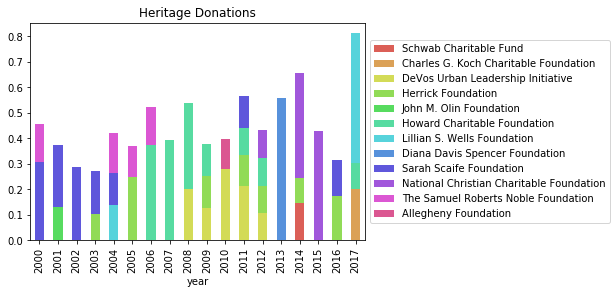

In [173]:
s_data.plot(kind='bar', stacked=True, 
            color = sns.set_palette(sns.color_palette("hls", 12)))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Heritage Donations')
plt.show()

In [143]:
for i in set(data['donor_name']):
    print(i)

Schwab Charitable Fund
Charles G. Koch Charitable Foundation
The Carthage Foundation
DeVos Urban Leadership Initiative
Claude R. Lambe Charitable Foundation
Herrick Foundation
The Lynde and Harry Bradley Foundation
John M. Olin Foundation
Howard Charitable Foundation
Lillian S. Wells Foundation
Diana Davis Spencer Foundation
Sarah Scaife Foundation
National Christian Charitable Foundation
The Samuel Roberts Noble Foundation
Allegheny Foundation
